In [1]:
import os
import re
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = {}
columns_set = None
all_columns = set()

#csv_files = glob.glob('metrics/final_*.csv')
csv_files = glob.glob('metrics/[!final_]*.csv')
for file in csv_files:
    model_name = file.split('/')[-1].split('.')[0].split("_")[-2]  # Extract model name from file name
    df = pd.read_csv(file)
    
    # Rename columns by removing underscore and following characters
    df.columns = [re.sub('_\\d', '', col) for col in df.columns]
    
    data[model_name] = df
    # Update columns_set with columns common to all DataFrames
    if columns_set is None:
        columns_set = set(df.columns)
    else:
        columns_set &= set(df.columns)
#    all_columns.append(set(df.columns)
    

Common columns ['auc', 'binary_accuracy', 'compile_metrics', 'epoch', 'loss', 'recall', 'step']


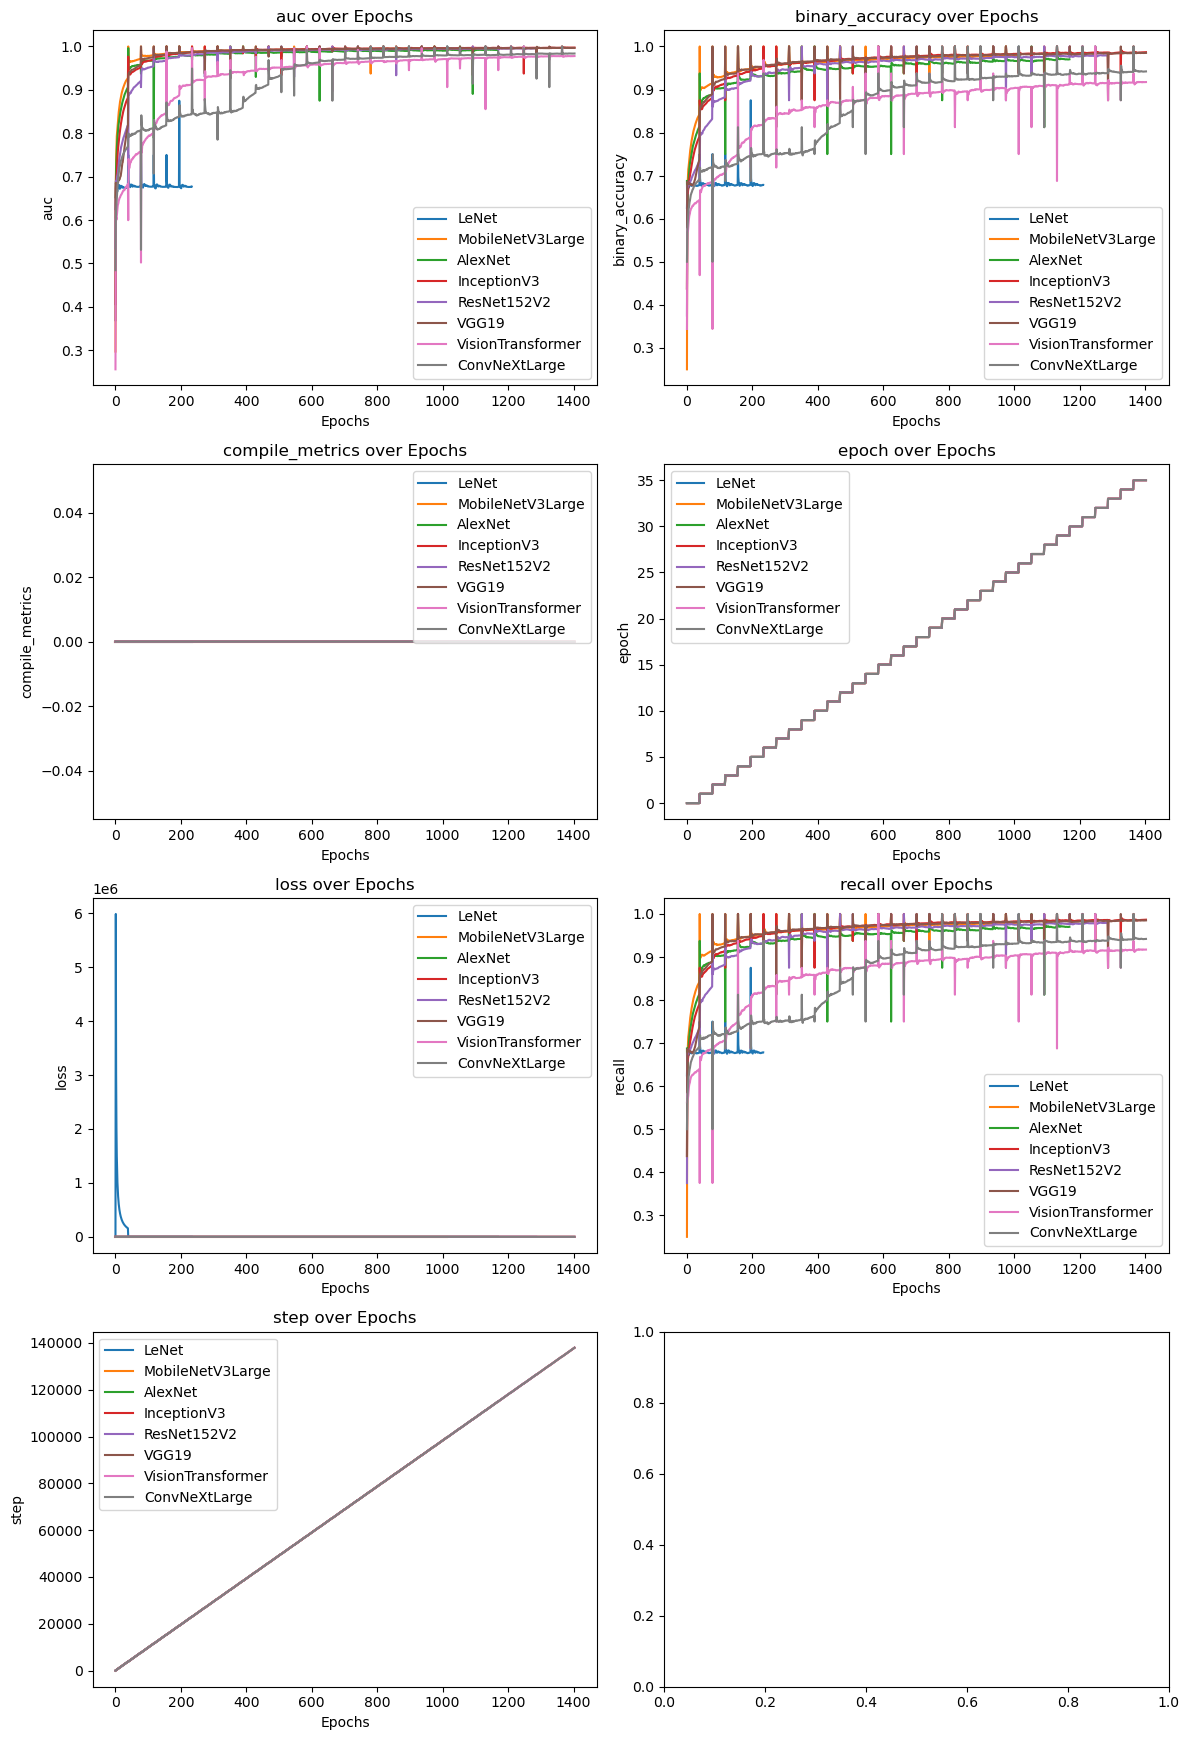

In [7]:
# Convert columns_set to a sorted list for consistency
columns_set -= set(['', "Unnamed: 0"])
common_columns = sorted(columns_set)

print("Common columns", common_columns)

# Create a subplot for each metric
num_metrics = len(common_columns)
fig, axes = plt.subplots(num_metrics // 2 +(1 if num_metrics % 2 != 0 else 0), 2, figsize=(12, 2.5 * num_metrics))
axes = axes.flatten()
if num_metrics == 1:
    axes = [axes]  # Ensure axes is iterable if there's only one metric

# Plot each metric
for i, metric in enumerate(common_columns):
    for model_name, df in data.items():
        #df = df.rolling(100).mean()
        sns.lineplot(data=df, x=df.index, y=metric, ax=axes[i], label=model_name)
    axes[i].set_title(f'{metric} over Epochs')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel(metric)
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("out/figure/all_final.png")

In [8]:
data_final = {}
columns_set = None
all_columns = set()

csv_files = glob.glob('metrics/final_*.csv')
#csv_files = glob.glob('metrics/[!final_]*.csv')
for file in csv_files:
    model_name = file.split('/')[-1].split('.')[0].split("_")[-2]  # Extract model name from file name
    df = pd.read_csv(file)
    
    # Rename columns by removing underscore and following characters
    df.columns = [re.sub('_\\d', '', col) for col in df.columns]
    
    data[model_name] = df
    # Update columns_set with columns common to all DataFrames
    if columns_set is None:
        columns_set = set(df.columns)
    else:
        columns_set &= set(df.columns)
#    all_columns.append(set(df.columns)

Common columns ['auc', 'binary_accuracy', 'recall', 'val_auc', 'val_binary_accuracy', 'val_recall']


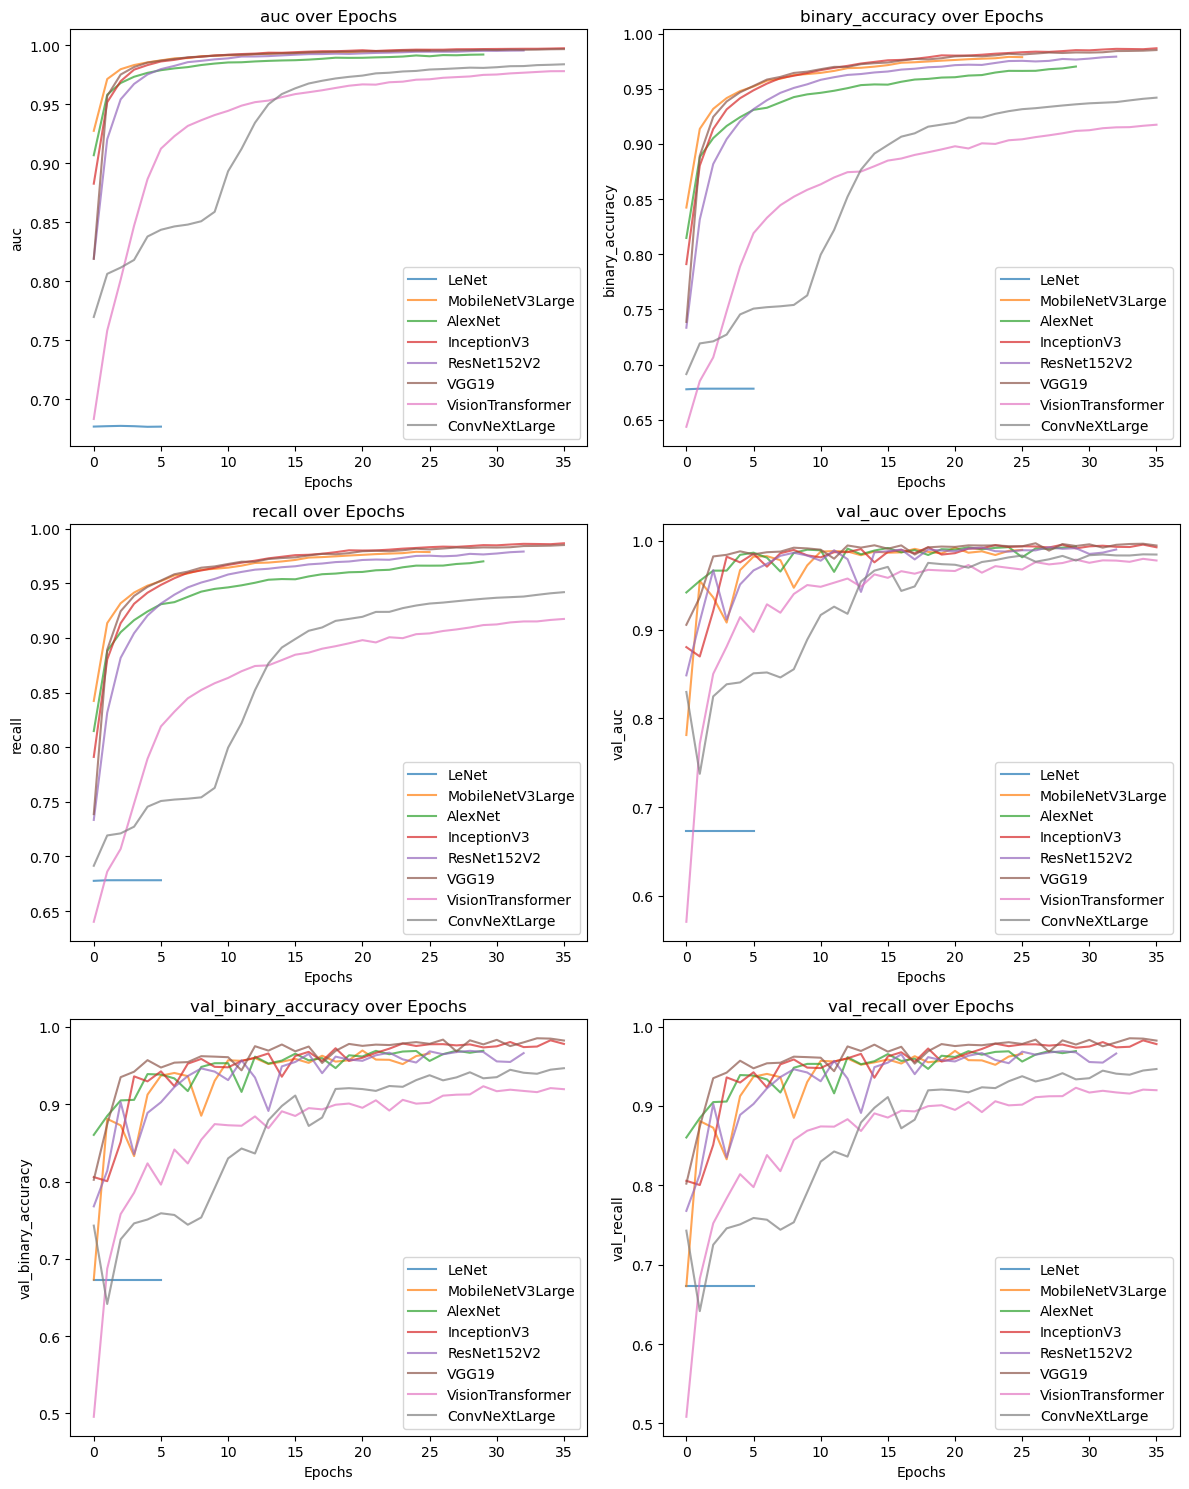

In [14]:
# Convert columns_set to a sorted list for consistency
columns_set -= set(['', "Unnamed: 0"])
common_columns = sorted(columns_set)

print("Common columns", common_columns)

# Create a subplot for each metric
num_metrics = len(common_columns)
fig, axes = plt.subplots(num_metrics // 2 +(1 if num_metrics % 2 != 0 else 0), 2, figsize=(12, 2.5 * num_metrics))
axes = axes.flatten()
if num_metrics == 1:
    axes = [axes]  # Ensure axes is iterable if there's only one metric

# Plot each metric
for i, metric in enumerate(common_columns):
    for model_name, df in data.items():
        #df = df.rolling(100).mean()
        sns.lineplot(data=df, x=df.index, y=metric, ax=axes[i], label=model_name, alpha=.7)
    axes[i].set_title(f'{metric} over Epochs')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel(metric)
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("out/figure/all_train.png")

In [10]:
columns_set -= set(["loss", "val_loss"])
# Step 1: Calculate the mean of each DataFrame
max_values = {key: df[sorted(list(columns_set))].max() for key, df in data.items()}
max_df = pd.DataFrame(max_values).T
max_df.to_latex(float_format="%.4f")

'\\begin{tabular}{lrrrrrr}\n\\toprule\n & auc & binary_accuracy & recall & val_auc & val_binary_accuracy & val_recall \\\\\n\\midrule\nLeNet & 0.6774 & 0.6782 & 0.6782 & 0.6731 & 0.6731 & 0.6731 \\\\\nMobileNetV3Large & 0.9954 & 0.9789 & 0.9789 & 0.9925 & 0.9695 & 0.9695 \\\\\nAlexNet & 0.9921 & 0.9702 & 0.9702 & 0.9938 & 0.9692 & 0.9692 \\\\\nInceptionV3 & 0.9974 & 0.9867 & 0.9867 & 0.9959 & 0.9827 & 0.9827 \\\\\nResNet152V2 & 0.9955 & 0.9792 & 0.9792 & 0.9930 & 0.9690 & 0.9690 \\\\\nVGG19 & 0.9966 & 0.9851 & 0.9851 & 0.9975 & 0.9853 & 0.9853 \\\\\nVisionTransformer & 0.9780 & 0.9174 & 0.9174 & 0.9799 & 0.9233 & 0.9230 \\\\\nConvNeXtLarge & 0.9838 & 0.9420 & 0.9420 & 0.9850 & 0.9466 & 0.9466 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [11]:
for name, df in data.items():
    print(name)
    print(df.max())

LeNet
Unnamed: 0                  5.000000
auc                         0.677413
binary_accuracy             0.678179
loss                   157783.125000
recall                      0.678179
val_auc                     0.673074
val_binary_accuracy         0.673074
val_loss                    0.632060
val_recall                  0.673074
dtype: float64
MobileNetV3Large
Unnamed: 0             25.000000
auc                     0.995377
binary_accuracy         0.978932
loss                    0.335731
recall                  0.978932
val_auc                 0.992545
val_binary_accuracy     0.969479
val_loss                0.642064
val_recall              0.969479
dtype: float64
AlexNet
Unnamed: 0             29.000000
auc                     0.992057
binary_accuracy         0.970176
loss                    0.408971
recall                  0.970176
val_auc                 0.993760
val_binary_accuracy     0.969186
val_loss                0.321324
val_recall              0.969186
dtype: float

# Plot instance segmentation

FileNotFoundError: [Errno 2] No such file or directory: 'out/yolo_synthetic'